In [24]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [25]:
# Load the dataset
df = pd.read_csv('/content/Dataset .csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [26]:
df.shape

(9551, 21)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [28]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [29]:
#drop missing values
df.dropna(subset=['Cuisines'], inplace=True)

In [30]:
#unique values
df.nunique()

Restaurant ID           9542
Restaurant Name         7437
Country Code              15
City                     140
Address                 8910
Locality                1206
Locality Verbose        1263
Longitude               8111
Latitude                8668
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

GeoDataFrame: It allows spatial operations on geometric types (e.g., points, lines, polygons). Using GeoDataFrame, we can handle geographical data more effectively, enabling visualization and spatial analysis.

CRS (Coordinate Reference System): CRS ensures that the spatial data points are correctly placed on the map. WGS84 (EPSG:4326) is a common global standard for latitude and longitude coordinates.

In [31]:
#Convert the DataFrame to a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

In [32]:
#Set the Coordinate Reference System (CRS)
gdf.set_crs(epsg=4326, inplace=True).head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,geometry
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,POINT (121.02754 14.56544)
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,POINT (121.01410 14.55371)
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,POINT (121.05683 14.58140)
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,POINT (121.05648 14.58532)
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,POINT (121.05751 14.58445)


<ipython-input-33-433005c429e7>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


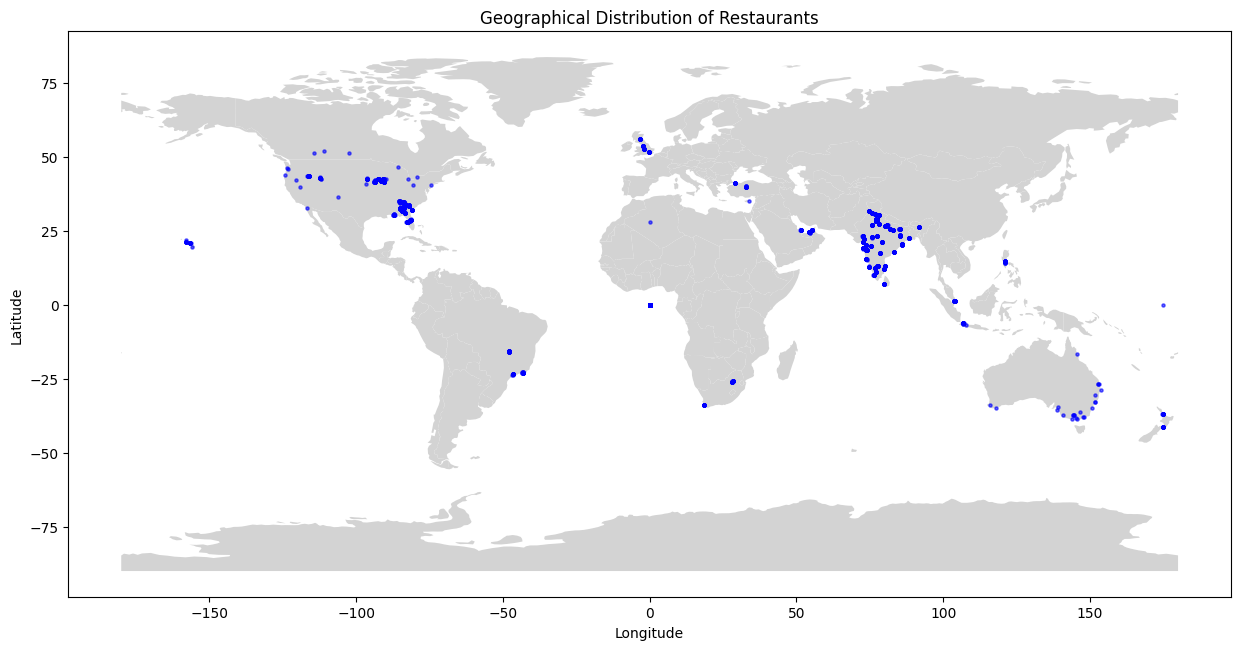

In [33]:
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgrey')

# Plot restaurants
gdf.plot(ax=ax, color='blue', markersize=5, alpha=0.6)
plt.title('Geographical Distribution of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

*   The plot shows dense clusters of restaurants in major urban areas, indicating that restaurants are heavily concentrated in cities.

*   India has a high concentration of restaurants, especially in major cities like New Delhi and Gurgaon.

*   Significant clusters are visible in the United States, particularly along the eastern and western coasts, with some concentration in the center.

*   Western Europe has a high concentration of restaurants, particularly in the United Kingdom, France, and Germany.

*   Some regions, such as Africa, South America, and parts of the Middle East, show fewer restaurants in this dataset,

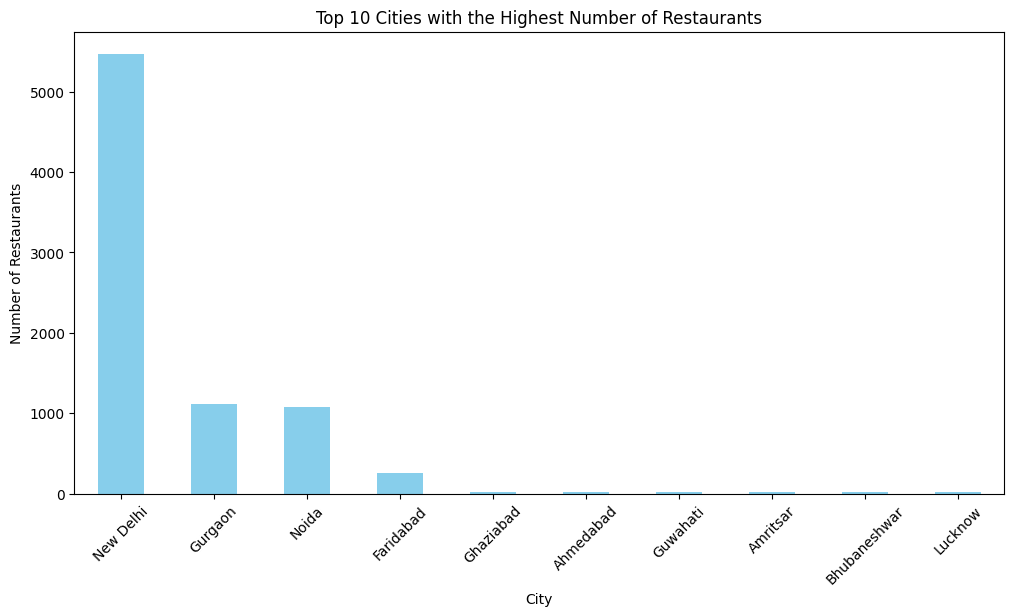

In [34]:
# Group by City and count the number of restaurants
city_counts = df['City'].value_counts().head(10)  # Displaying only top 10 cities for visualization

# Bar plot for top 10 cities with the highest number of restaurants
plt.figure(figsize=(12, 6))
city_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities with the Highest Number of Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

*   Cities with a greater number of restaurants indicate a thriving food culture and a large customer base.

*   Cities with the highest number of restaurants may experience market saturation, resulting in intense competition among restaurants.

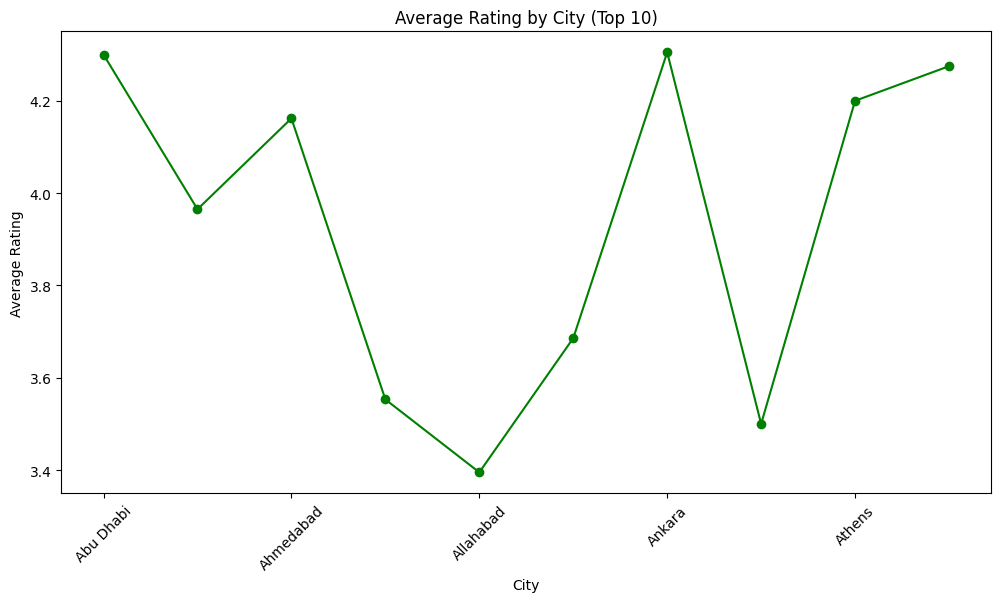

In [35]:
avg_rating_by_city = df.groupby('City')['Aggregate rating'].mean().head(10)

# Line plot for average rating by city
plt.figure(figsize=(12, 6))
avg_rating_by_city.plot(kind='line', marker='o', color='green')
plt.title('Average Rating by City (Top 10)')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

*   The line plot of average ratings demonstrates that some cities have higher average ratings than others. This could indicate a higher overall quality of dining experiences in these cities, as well as increased customer preferences.

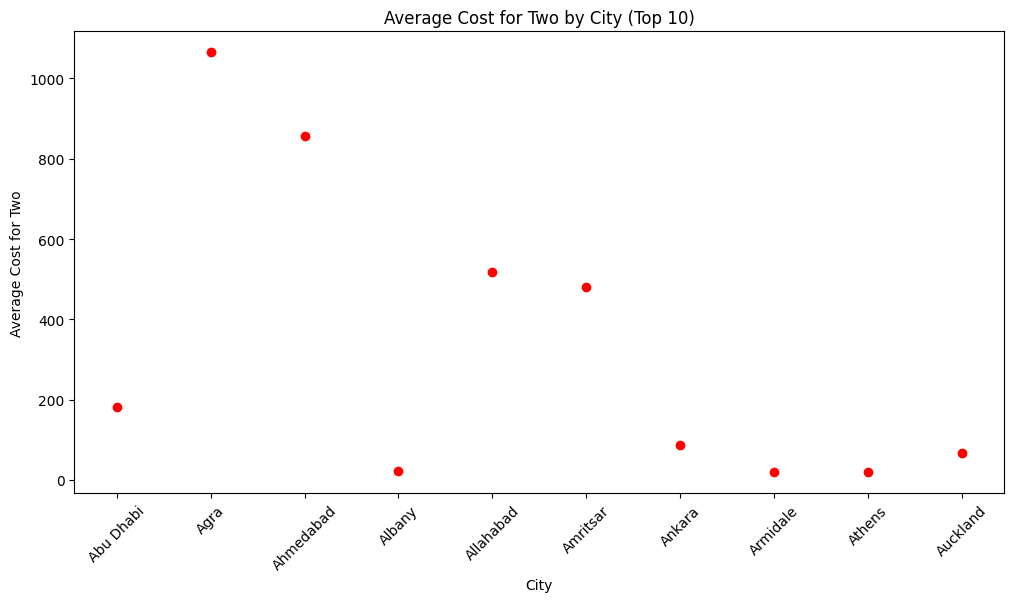

In [36]:
# Average cost for two by city
avg_cost_by_city = df.groupby('City')['Average Cost for two'].mean().head(10)

# Scatter plot for average cost for two by city
plt.figure(figsize=(12, 6))
plt.scatter(avg_cost_by_city.index, avg_cost_by_city.values, color='red')
plt.title('Average Cost for Two by City (Top 10)')
plt.xlabel('City')
plt.ylabel('Average Cost for Two')
plt.xticks(rotation=45)
plt.show()

*   The scatter plot for the average cost for two highlights significant variations in dining costs across different cities, reflecting a higher cost of living and the presence of upscale dining options.

*   Cities with lower average costs may cater to a broader demographic by providing more affordable dining options. This could attract both budget-conscious diners and tourists.

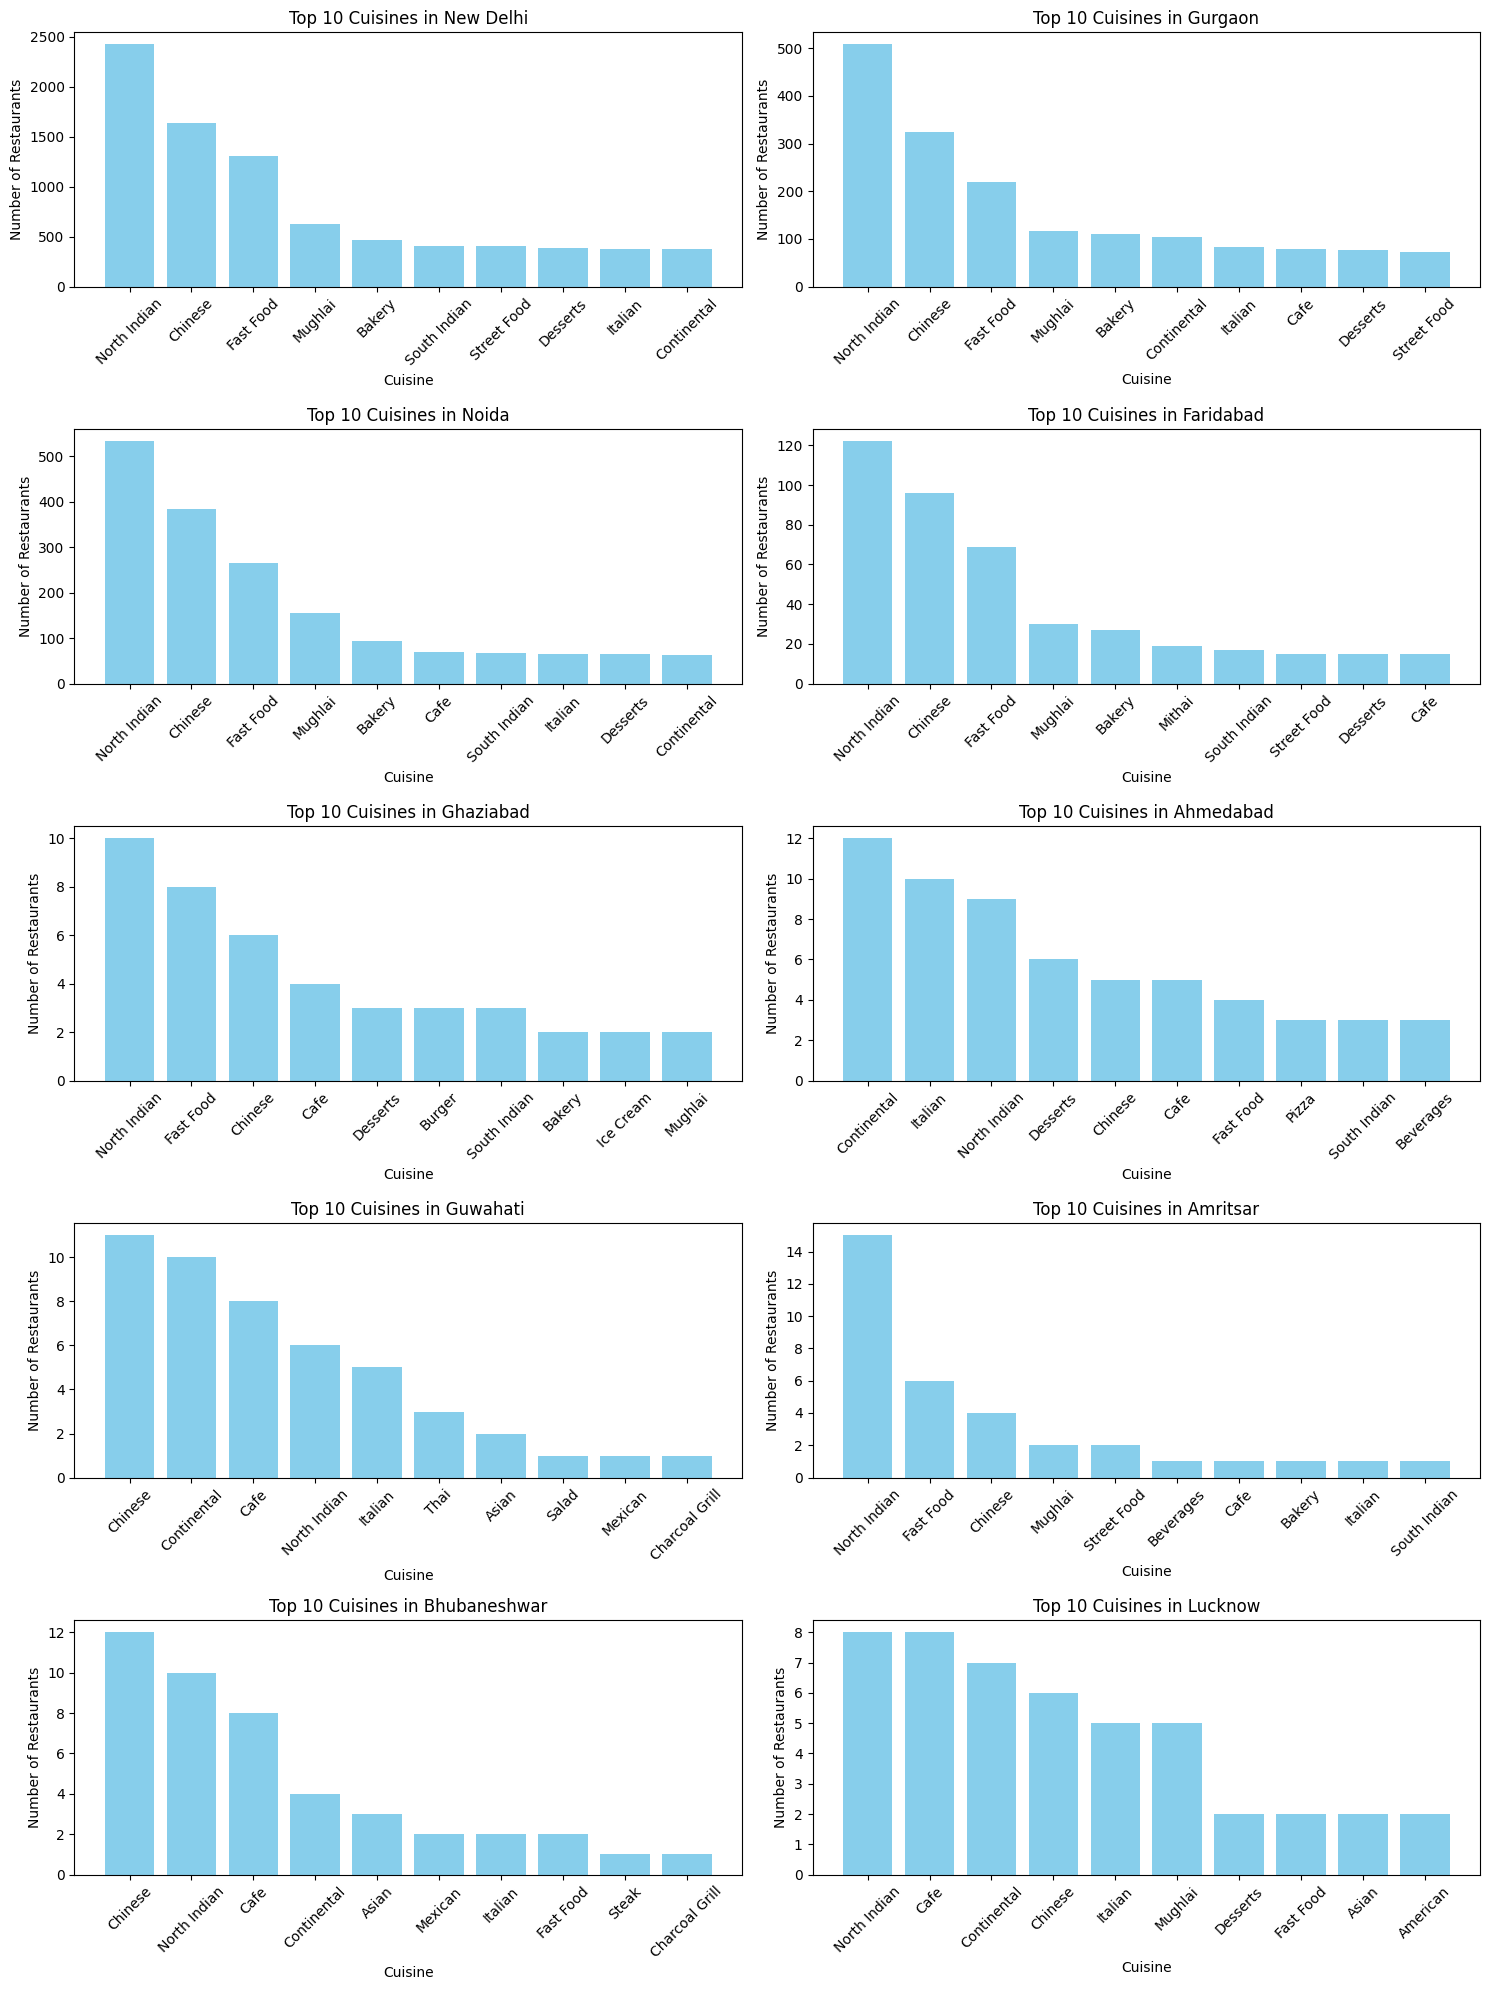

In [37]:
# Select the top 10 cities with the most restaurants
top_cities = df['City'].value_counts().head(10).index

# Function to extract cuisines for a specific city
def get_cuisines_for_city(city):
    cuisines = df[df['City'] == city]['Cuisines']
    cuisines_list = ', '.join(cuisines).split(', ')
    return Counter(cuisines_list)

# Plotting top cuisines for each of the top 10 cities
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.ravel()

for idx, city in enumerate(top_cities):
    cuisines_counter = get_cuisines_for_city(city)
    top_cuisines = pd.Series(cuisines_counter).sort_values(ascending=False).head(10)
    axes[idx].bar(top_cuisines.index, top_cuisines.values, color='skyblue')
    axes[idx].set_title(f'Top 10 Cuisines in {city}')
    axes[idx].set_xlabel('Cuisine')
    axes[idx].set_ylabel('Number of Restaurants')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The above charts show the top cuisines in various cities, demonstrating the diversity of food offerings. New Delhi and Gurgaon are likely to have a diverse range of cuisines that reflect their multicultural populations.

Analyzing cities with an increasing number of restaurants can help identify emerging markets where the food industry is rapidly expanding. These cities may present new opportunities for restaurateurs and investors.